# Cyclistic Case Study

**Summary of Scenario**:
As a junior analyst on the marketing team at Cyclistic, a bike-share company, I have been tasked to study the behavior of how clients use Cyclistic bikes.

Client Membership Types:
*   member: clients that have purchased the annual membership.
*   casual member: clients that have purchased single-ride passes or full-day passes.

Datasets used for this analysis is made avaliable by Motivate International Inc. under the following [license](https://divvybikes.com/data-license-agreement). Datasets used for this case study can be found through the following [link](https://divvy-tripdata.s3.amazonaws.com/index.html).

**Business Task**: Analyze historical bike data from January 2023 - December 2023 to identify trends among Cyclistic members and casual riders to create marketing strategies to convert casual riders to members.

**Key Stakeholders**:


*   Lily Moreno, director of marketing at Cyclistic

*   Cyclistic Executive Team





## Data Cleaning and Organization

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from plotnine import ggplot, aes, geom_point, labs, facet_wrap, theme, geom_bar, element_text

In [3]:
from google.colab import drive
drive.mount('/mnt/drive')
mth1 = pd.read_csv('/mnt/drive/MyDrive/Bike_Data/202301-divvy-tripdata/202301-divvy-tripdata.csv')
mth2 = pd.read_csv('/mnt/drive/MyDrive/Bike_Data/202302-divvy-tripdata/202302-divvy-tripdata.csv')
mth3 = pd.read_csv('/mnt/drive/MyDrive/Bike_Data/202303-divvy-tripdata/202303-divvy-tripdata.csv')
mth4 = pd.read_csv('/mnt/drive/MyDrive/Bike_Data/202304-divvy-tripdata/202304-divvy-tripdata.csv')
mth5 = pd.read_csv('/mnt/drive/MyDrive/Bike_Data/202305-divvy-tripdata/202305-divvy-tripdata.csv')
mth6 = pd.read_csv('/mnt/drive/MyDrive/Bike_Data/202306-divvy-tripdata/202306-divvy-tripdata.csv')
mth7 = pd.read_csv('/mnt/drive/MyDrive/Bike_Data/202307-divvy-tripdata/202307-divvy-tripdata.csv')
mth8 = pd.read_csv('/mnt/drive/MyDrive/Bike_Data/202308-divvy-tripdata/202308-divvy-tripdata.csv')
mth9 = pd.read_csv('/mnt/drive/MyDrive/Bike_Data/202309-divvy-tripdata/202309-divvy-tripdata.csv')
mth10 = pd.read_csv('/mnt/drive/MyDrive/Bike_Data/202310-divvy-tripdata/202310-divvy-tripdata.csv')
mth11 = pd.read_csv('/mnt/drive/MyDrive/Bike_Data/202311-divvy-tripdata/202311-divvy-tripdata.csv')
mth12 = pd.read_csv('/mnt/drive/MyDrive/Bike_Data/202312-divvy-tripdata/202312-divvy-tripdata.csv')


Mounted at /mnt/drive


In [4]:
#performing union (vertical) with all datasets
yearly_tripdata = pd.concat([mth1, mth2, mth3, mth4, mth5, mth6, mth7, mth8, mth9, mth10, mth11, mth12])
yearly_tripdata.head(-1)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,member
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
224067,AB675DD0012CBD57,electric_bike,2023-12-04 23:34:11,2023-12-04 23:39:16,Racine Ave & 18th St,13164,Racine Ave & Congress Pkwy,TA1306000025,41.858239,-87.656382,41.874640,-87.657030,member
224068,F74DF9549B504A6B,electric_bike,2023-12-07 13:15:24,2023-12-07 13:17:37,900 W Harrison St,13028,Racine Ave & Congress Pkwy,TA1306000025,41.874702,-87.649804,41.874640,-87.657030,casual
224069,BCDA66E761CC1029,classic_bike,2023-12-08 18:42:21,2023-12-08 18:45:56,900 W Harrison St,13028,Racine Ave & Congress Pkwy,TA1306000025,41.874754,-87.649807,41.874640,-87.657030,casual
224070,D2CF330F9C266683,classic_bike,2023-12-05 14:09:11,2023-12-05 14:13:01,900 W Harrison St,13028,Racine Ave & Congress Pkwy,TA1306000025,41.874754,-87.649807,41.874640,-87.657030,member


## Analysis
### **Main Question:  How do annual members and casual riders use Cyclistic bikes differently?**


Behavior To Study:
1. ridetype most used by annual members vs casual members
2. member type time usage of Cyclistic bike
3. what months casual riders used service? what months did annual members used service?
4. frequency of riders (comparison of amount of riders between annual and casual members)

### Behavior Studying:
In this section, the ridetype most used by annual members vs casual members was studied.





In [6]:
yearly_tripdata["member_casual"].value_counts()

member_casual
member    3660698
casual    2059179
Name: count, dtype: int64

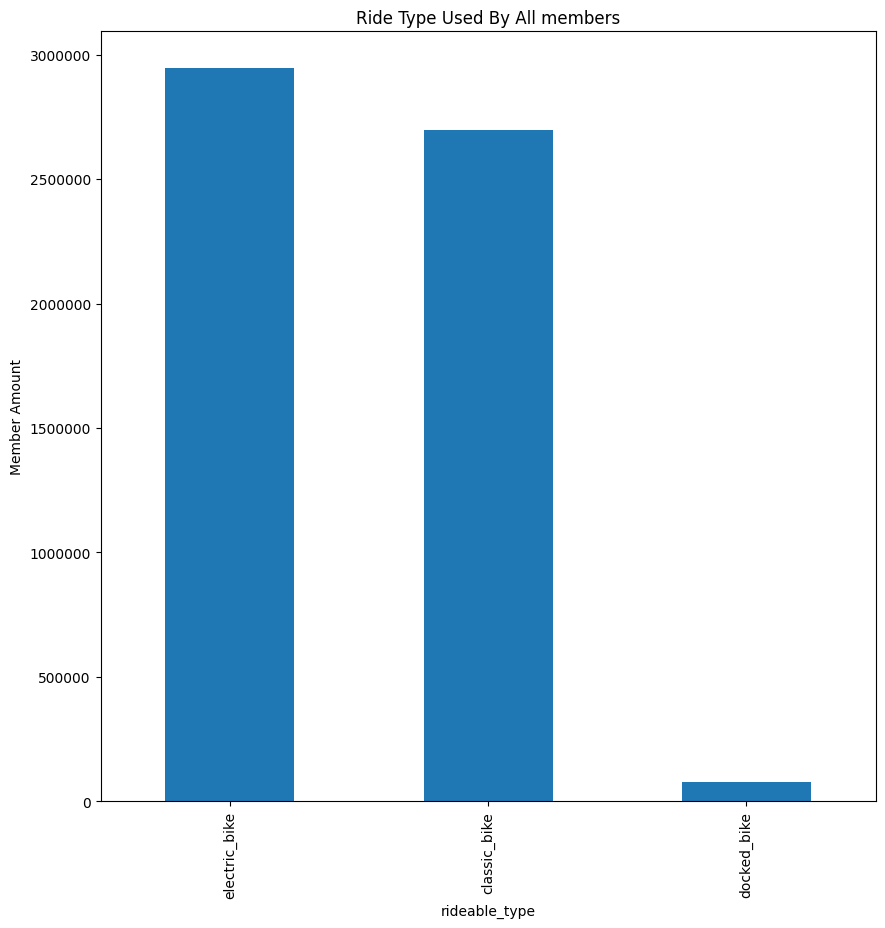

In [8]:
fig, ax = plt.subplots(figsize=[10, 10])
plt.title("Ride Type Used By All members")
plt.ticklabel_format(style='plain')
yearly_tripdata["rideable_type"].value_counts().plot.bar()
plt.ylabel("Member Amount")
plt.show()

**Graph Explanation**:

It was found that through the entire year of 2023 both membership types, those with annual memberships and casual members both preferred using electric bikes, while Classic bikes were the next preferred type of bike.

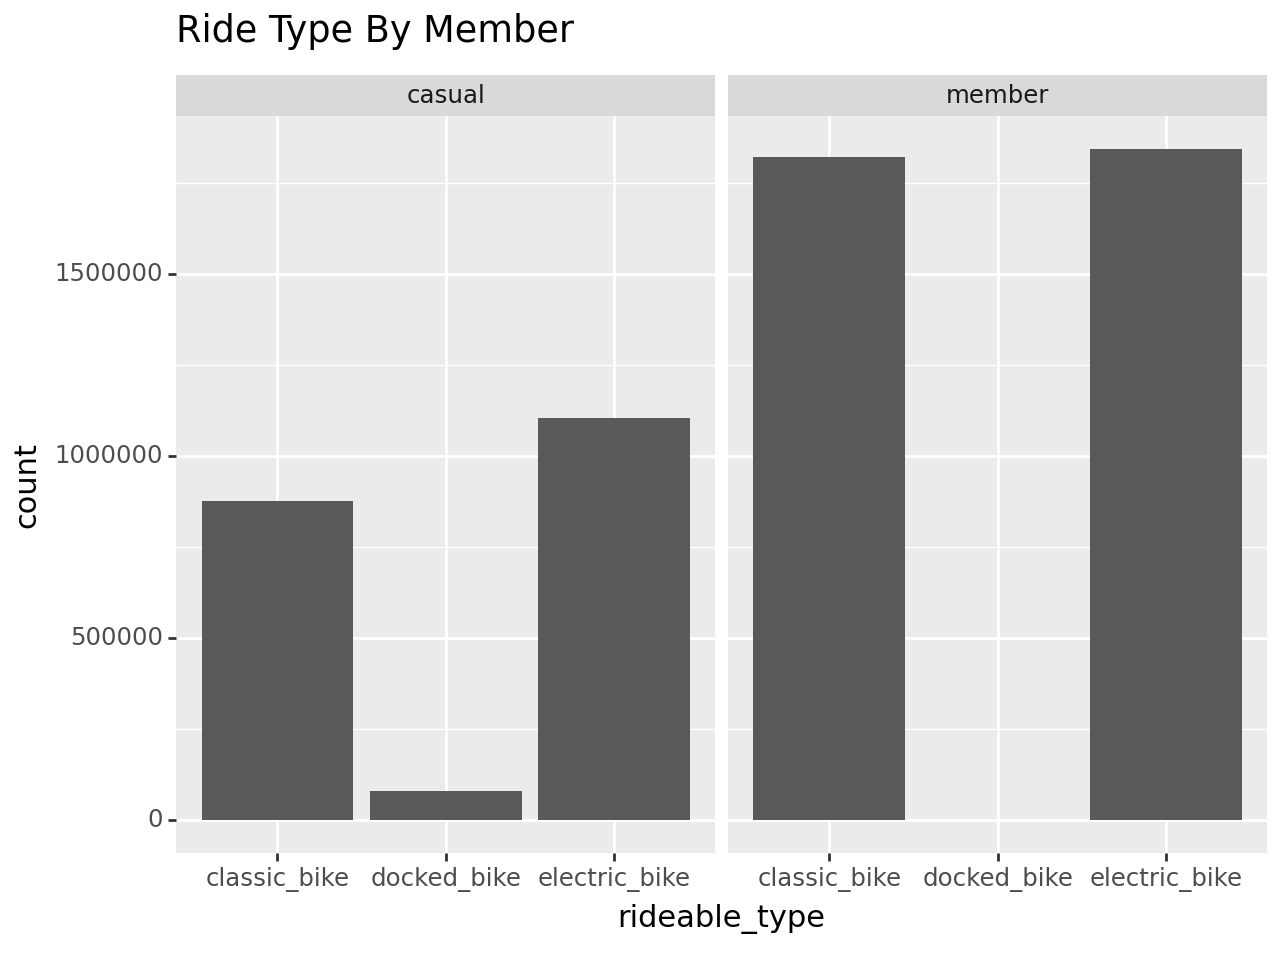

<Figure Size: (640 x 480)>

In [11]:
ggplot(yearly_tripdata) + geom_bar(aes(x="rideable_type")) + facet_wrap("member_casual") + labs(title="Ride Type By Member")

**Graph Explanation**:

To further breakdown members preference of service, the rideable type preference was broken down by casual members and annual members. Findings from the previous graph were also noticed within these graphs: annual members had high preference to electronic bikes follows by classic bikes, while casual members followed a similiar pattern, with the exception being that they also had minor preference towards docked bikes while annual members had no preference toward docked bikes.

### Behavior Studying:
In this section, the member type time and monthly usage of Cyclistic bikes were studied.

In [18]:
#Question 2: who rode longer/shorter (look at type of ridetype, member_type)
yearly_tripdata['time_difference'] = pd.to_datetime(yearly_tripdata['ended_at']) - pd.to_datetime(yearly_tripdata['started_at'])
yearly_tripdata.head(-1)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,time_difference
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,member,0 days 00:10:51
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,0 days 00:08:29
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual,0 days 00:13:14
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,0 days 00:08:46
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,0 days 00:15:19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224067,AB675DD0012CBD57,electric_bike,2023-12-04 23:34:11,2023-12-04 23:39:16,Racine Ave & 18th St,13164,Racine Ave & Congress Pkwy,TA1306000025,41.858239,-87.656382,41.874640,-87.657030,member,0 days 00:05:05
224068,F74DF9549B504A6B,electric_bike,2023-12-07 13:15:24,2023-12-07 13:17:37,900 W Harrison St,13028,Racine Ave & Congress Pkwy,TA1306000025,41.874702,-87.649804,41.874640,-87.657030,casual,0 days 00:02:13
224069,BCDA66E761CC1029,classic_bike,2023-12-08 18:42:21,2023-12-08 18:45:56,900 W Harrison St,13028,Racine Ave & Congress Pkwy,TA1306000025,41.874754,-87.649807,41.874640,-87.657030,casual,0 days 00:03:35
224070,D2CF330F9C266683,classic_bike,2023-12-05 14:09:11,2023-12-05 14:13:01,900 W Harrison St,13028,Racine Ave & Congress Pkwy,TA1306000025,41.874754,-87.649807,41.874640,-87.657030,member,0 days 00:03:50


In [7]:
#Question 3: what months casual riders used service? what months did annual members used service?

# Extract month as a string from 'started_at'
yearly_tripdata['month'] = pd.to_datetime(yearly_tripdata['started_at']).dt.strftime('%m')

# Create a new column 'is_january' based on whether 'month' is '01'
yearly_tripdata.loc[yearly_tripdata['month'] == '01', 'month'] = "January"
yearly_tripdata.loc[yearly_tripdata['month'] == '02', 'month'] = "February"
yearly_tripdata.loc[yearly_tripdata['month'] == '03', 'month'] = "March"
yearly_tripdata.loc[yearly_tripdata['month'] == '04', 'month'] = "April"
yearly_tripdata.loc[yearly_tripdata['month'] == '05', 'month'] = "May"
yearly_tripdata.loc[yearly_tripdata['month'] == '06', 'month'] = "June"
yearly_tripdata.loc[yearly_tripdata['month'] == '07', 'month'] = "July"
yearly_tripdata.loc[yearly_tripdata['month'] == '08', 'month'] = "August"
yearly_tripdata.loc[yearly_tripdata['month'] == '09', 'month'] = "September"
yearly_tripdata.loc[yearly_tripdata['month'] == '10', 'month'] = "October"
yearly_tripdata.loc[yearly_tripdata['month'] == '11', 'month'] = "November"
yearly_tripdata.loc[yearly_tripdata['month'] == '12', 'month'] = "December"

yearly_tripdata.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,time_difference,month
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,member,0 days 00:10:51,January
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,0 days 00:08:29,January
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual,0 days 00:13:14,January
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,0 days 00:08:46,January
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,0 days 00:15:19,January


In [23]:
yearly_tripdata['time_difference'].value_counts()

time_difference
0 days 00:04:52    6882
0 days 00:04:41    6851
0 days 00:05:16    6817
0 days 00:05:17    6809
0 days 00:04:35    6807
                   ... 
5 days 10:09:21       1
5 days 03:08:00       1
4 days 07:39:34       1
8 days 15:12:52       1
0 days 12:23:49       1
Name: count, Length: 23070, dtype: int64

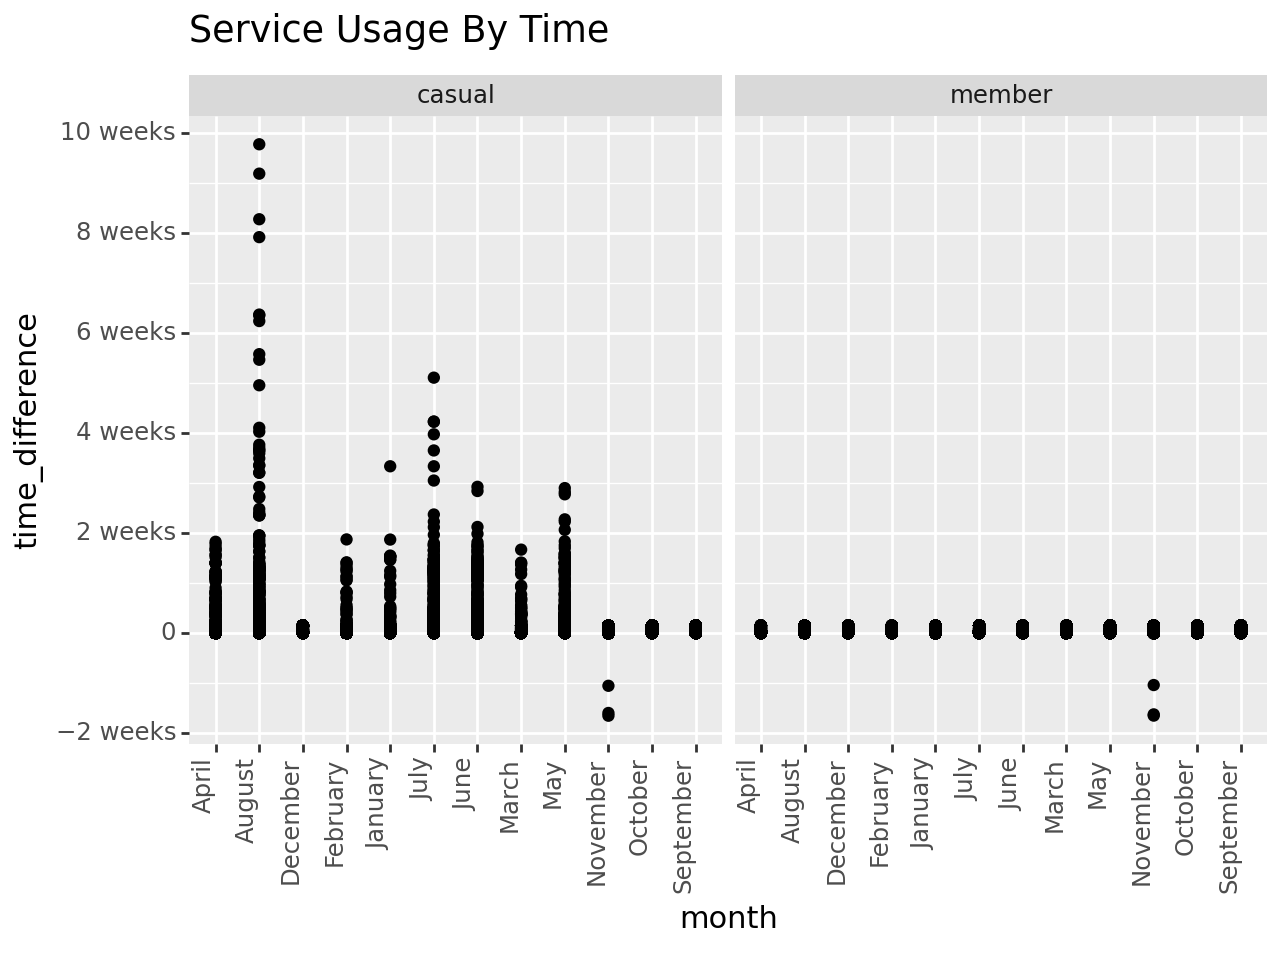

<Figure Size: (640 x 480)>

In [10]:
##Question 2: who rode longer/shorter (look at type of ridetype, member_type)
ggplot(yearly_tripdata) + geom_point(aes(x="month", y="time_difference")) + facet_wrap("member_casual") + labs(title="Service Usage By Time") + theme(axis_text_x=element_text(rotation=90, hjust=1))




**Graph Analysis:**

It was found that casual members didn't follow the rental procedures and had them longer than a day, while annual members returned the bike after their daily usage.

From this graph, casual members held onto rental bikes for longer periods of time in the months of August, July, January, May, June, February, March, April. So, casual members use our bikes in the beginning of the year in comparsion to the second half on the year.

In [9]:
yearly_tripdata.head(-1)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,time_difference,month
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,member,0 days 00:10:51,January
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,0 days 00:08:29,January
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual,0 days 00:13:14,January
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,0 days 00:08:46,January
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,0 days 00:15:19,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224067,AB675DD0012CBD57,electric_bike,2023-12-04 23:34:11,2023-12-04 23:39:16,Racine Ave & 18th St,13164,Racine Ave & Congress Pkwy,TA1306000025,41.858239,-87.656382,41.874640,-87.657030,member,0 days 00:05:05,December
224068,F74DF9549B504A6B,electric_bike,2023-12-07 13:15:24,2023-12-07 13:17:37,900 W Harrison St,13028,Racine Ave & Congress Pkwy,TA1306000025,41.874702,-87.649804,41.874640,-87.657030,casual,0 days 00:02:13,December
224069,BCDA66E761CC1029,classic_bike,2023-12-08 18:42:21,2023-12-08 18:45:56,900 W Harrison St,13028,Racine Ave & Congress Pkwy,TA1306000025,41.874754,-87.649807,41.874640,-87.657030,casual,0 days 00:03:35,December
224070,D2CF330F9C266683,classic_bike,2023-12-05 14:09:11,2023-12-05 14:13:01,900 W Harrison St,13028,Racine Ave & Congress Pkwy,TA1306000025,41.874754,-87.649807,41.874640,-87.657030,member,0 days 00:03:50,December


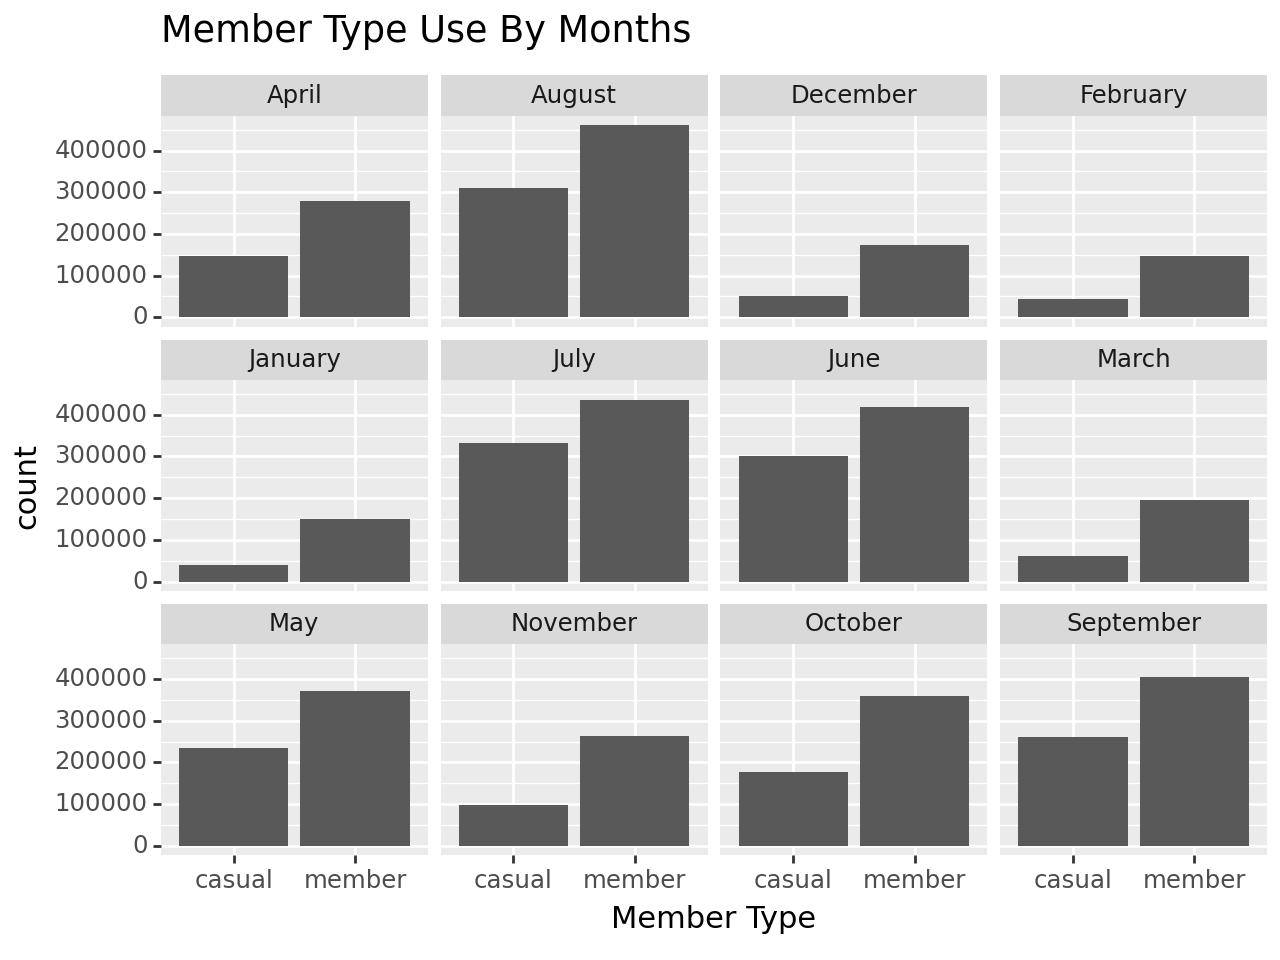

<Figure Size: (640 x 480)>

In [24]:
ggplot(yearly_tripdata) + geom_bar(aes(x="member_casual")) + facet_wrap("~month") + labs(title="Member Type Use By Months", x="Member Type")

**Graph Analysis:**

Top 3 Months usage for annual members:
*   August (1st in rank)
*   July (2nd in rank)
*   June (3rd in rank)


Top 3 Months usage fo casual members:
*   July (1st in rank)
*   August (2nd in rank)
*   June (3rd in rank)

Overall, both annual members and casual members had a high preference of renting Cyclistic bikes during the same summer months.

### Behavior Studying:
Comparsion of Cyclistic Members.


[]

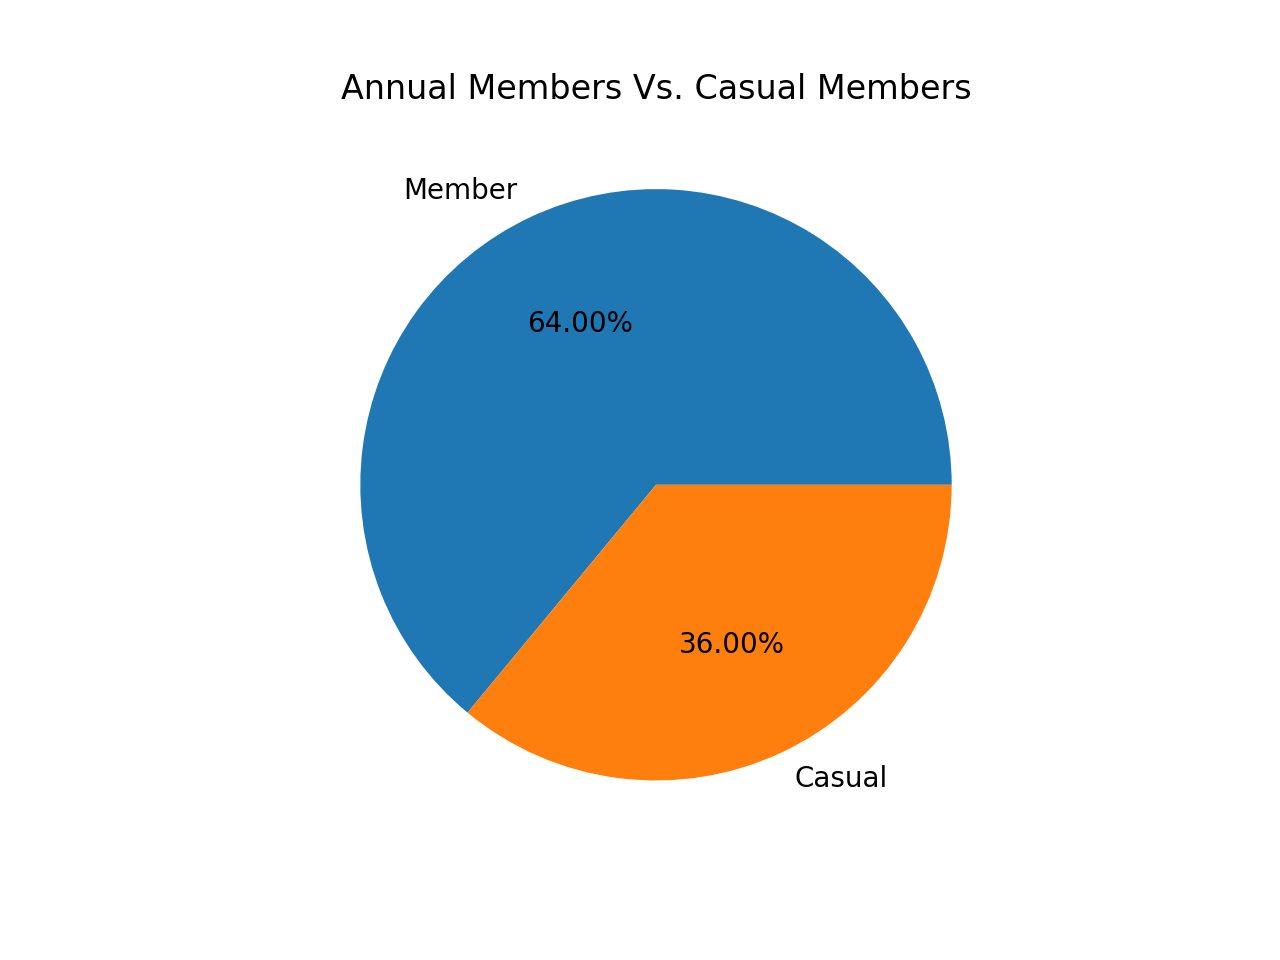

In [14]:
#Question 4: frequency of riders (comparison of amount of riders between annual and casual members)

category = ['Member', 'Casual']
plt.title("Annual Members Vs. Casual Members")

plt.pie(yearly_tripdata['member_casual'].value_counts(), labels = category, autopct='%.2f%%')
plt.plot()

**Graph Analysis**:

In the year 2023, Cyclistic had a higher amount of members that had annual membership passes in comparsion to casual daily usage members.

## Summary of Key Findings


*   Both casual and annual members had a high preference and usage towards electric bikes followed by classic bikes.
*   Casual members held on to rental bikes longer than a day (from January - August), while annual members were consistent in returning the bikes after daily usage.
*   Both types of members rented Cyclistic bikes during summer months, which included June, July, August. For casual members July ranked first, August ranked second, June ranked last. For annual members August ranked first, July ranked second, June ranked last.
*   The majority of Cyclistic members are composed of annual members (64%) compared to casual members (36% of Cyclistic's clients).





## Top 3 Recommendations (marketing strategies)



*   Consider having annual membership sales at the start of each year to gather casual membership interest.
*   Consider having a summer season passes to meet casual members usage of Cyclistic bikes.
*   Consider creating Half-Year membership to encourage casual members to ease into annual membership.

